# Function Showcase

#### Import libraries
The functions we will use inhabit the ``` internal ``` module

In [3]:
import os, sys
sys.path.insert(1, os.getcwd()+'/..')
from internal import *

## Generator Functions
We use the functions:
```bash
generate_frequencies
generate_amplitudes
generate_phase
generate_signal
```
to generate the synthetical signals.
- ```generate_frequencies``` randomly generates ```N``` frequencies 
- ```generate_amplitudes``` randomly generates ```N``` amplitudes 
- ```generate_phases``` randomly generates ```N``` phases 
- ```generate_signal``` Takes a set of frequencies, amplitudes and phases, creating a sinusoidal wave with each of them and adding them all together to create a signal. This function also uses a given signal duration and sampling rate

### Setting the parameters

In [4]:
sr = 100;       # Hz. Sampling rate
t = 10;         # s. Duration of the signal
n_bins = 1000;  # Number of bins to use for the DFT calculation
N = 1000;       # Number of different frequencies composing the signal

### Generate the signal

In [5]:
freq = generate_frequencies(N, sigma=0.25, f0=25, sr=sr);
A = generate_amplitudes(N, sigma= 10);
phi = generate_phase(N)
x, y = generate_signal(freq, A, t=t, phi=phi, sr=sr);

#### Add high frequency noise
We can also use the generator funtions to add characteristincs to our artificial signal. For example, we can add random high frequency noise:

In [6]:
AN = generate_amplitudes(10);
f0 = np.random.normal(40, 0.1, 10)
_, noise = generate_signal(f0, AN, t=t, sr=sr)
y += noise;
f0

array([40.11742717, 39.97715324, 39.92826762, 40.04522031, 39.98304006,
       40.11105792, 39.93453209, 39.91974979, 39.87523046, 40.00506036])

## The Processor class
We have created a class called ```Processor``` that allows us to handle and process any given signal. This class takes as input the signal and its sampling rate.

In [7]:
signal = Processor(y, sr)
signal.check()


        signal duration: 10.0 s
        sample rate:     100 Hz
        Nº samples:      1000
        


The ```Processor``` class contains several methods based on the rest of the functions in ```internal```. These functions enable the user to plot the signal, calculate the its FFT, run tests like energy conservation based on Parseval's theorem and set windows along the signal, segmenting the FFT calculations.

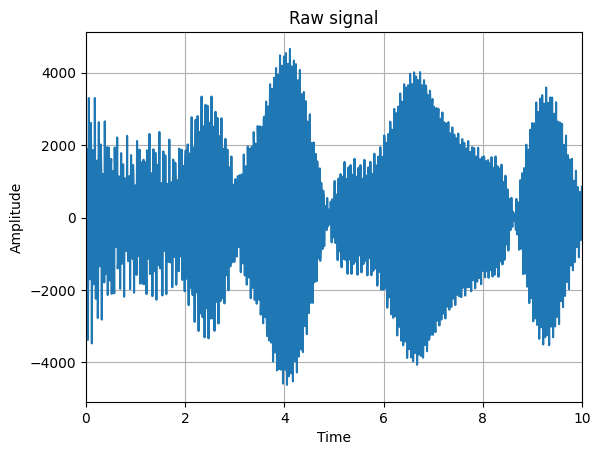

In [8]:
signal.plot_signal();

#### About the FFT:
When calculating the FFT we keep both the imaginary and real part.
When plotting we consider only positive frequencies and can choose between plotting the imaginary and real part separately of plotting the module (default option)


        Energy time domain:      3966798016.9824133
        Energy frequency domain: 3966798016.982414
        Ratio:                   0.9999999999999999
        


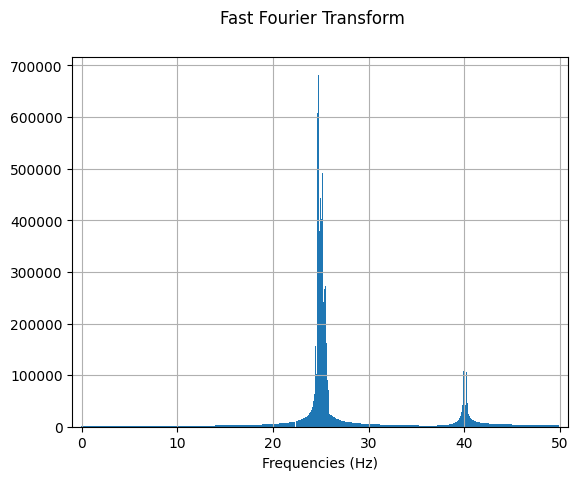

In [9]:
signal.fft_bin(n_bins)
signal.Parseval()
signal.plot_fft();